In [5]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = pd.read_csv(r'C:\Users\Оксана\Downloads\survey_lung_cancer.csv')
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [9]:
df['GENDER'] = df['GENDER'].replace({'M': 'Male', 'F': 'Female'})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 2, 'NO': 1})
df = pd.get_dummies(df, columns=['GENDER'])
df.rename(columns={'Gender_M':'Male', 'Gender_G':'Female'}, inplace=True)
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_Female,GENDER_Male
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1,1,0


In [10]:
df.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_Female,GENDER_Male
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465,-0.021306,0.021306
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179,-0.036277,0.036277
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339,0.212959,-0.212959
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947,0.152127,-0.152127
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388,0.275564,-0.275564
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891,0.204606,-0.204606
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673,0.083560,-0.083560
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766,-0.154251,0.154251
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300,-0.141207,0.141207
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226,0.288533,-0.454268,0.454268


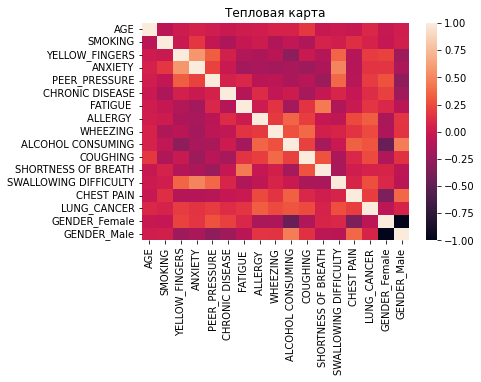

In [11]:
plt.title('Тепловая карта')
sns.heatmap(df.corr());

In [12]:
y = df['LUNG_CANCER']
x = df.drop(['LUNG_CANCER'], axis=1)

In [13]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.77185028, -1.13529242,  0.86929961, ...,  0.892475  ,
        -0.95257934,  0.95257934],
       [ 1.38182914,  0.88083033, -1.15035137, ...,  0.892475  ,
        -0.95257934,  0.95257934],
       [-0.44810745, -1.13529242, -1.15035137, ...,  0.892475  ,
         1.04978132, -1.04978132],
       ...,
       [-0.57010322,  0.88083033, -1.15035137, ...,  0.892475  ,
        -0.95257934,  0.95257934],
       [ 0.52785873,  0.88083033, -1.15035137, ...,  0.892475  ,
        -0.95257934,  0.95257934],
       [-0.08212013, -1.13529242, -1.15035137, ..., -1.12047956,
        -0.95257934,  0.95257934]])

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42);

In [15]:
lr = LogisticRegression() # LogisticRegression
lr.fit(xtrain, ytrain)
lr_p = lr.predict(xtest)
lr_report = classification_report(ytest, lr_p)
lr_a = round(accuracy_score(ytest, lr_p)*100, ndigits=2)
print(f'Acyracity of Logistic regrassion - {lr_a}\nClassification report - \n {lr_report}')


Acyracity of Logistic regrassion - 96.77
Classification report - 
               precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [16]:
svmet = svm.SVC()
svmet.fit(xtrain, ytrain)
svmet_p = svmet.predict(xtest)
svmet_report = classification_report(ytest, lr_p)
svmet_a = round(accuracy_score(ytest, lr_p)*100, ndigits=2)
print(f'Acyracity of SVM - {svmet_a}\nClassification report - \n {svmet_report}')


Acyracity of SVM - 96.77
Classification report - 
               precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [19]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
gnb_p = gnb.predict(xtest)
gnb_report = classification_report(ytest, gnb_p)
gnb_a = round(accuracy_score(ytest, gnb_p)*100, ndigits=2)
print(f'Acyracity of GaussianNB - {gnb_a}\nClassification report - \n {gnb_report}')

Acyracity of GaussianNB - 95.16
Classification report - 
               precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



In [23]:
kn = KNeighborsClassifier()
kn.fit(xtrain, ytrain)
kn_p = kn.predict(xtest)
kn_report = classification_report(ytest, kn_p)
kn_a = round(accuracy_score(ytest, kn_p)*100, ndigits=2)
print(f'Acyracity of KNeighborsClassifier - {kn_a}\nClassification report - \n {kn_report}')

Acyracity of KNeighborsClassifier - 93.55
Classification report - 
               precision    recall  f1-score   support

           1       0.25      0.50      0.33         2
           2       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62

